In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)

<Figure size 432x288 with 0 Axes>

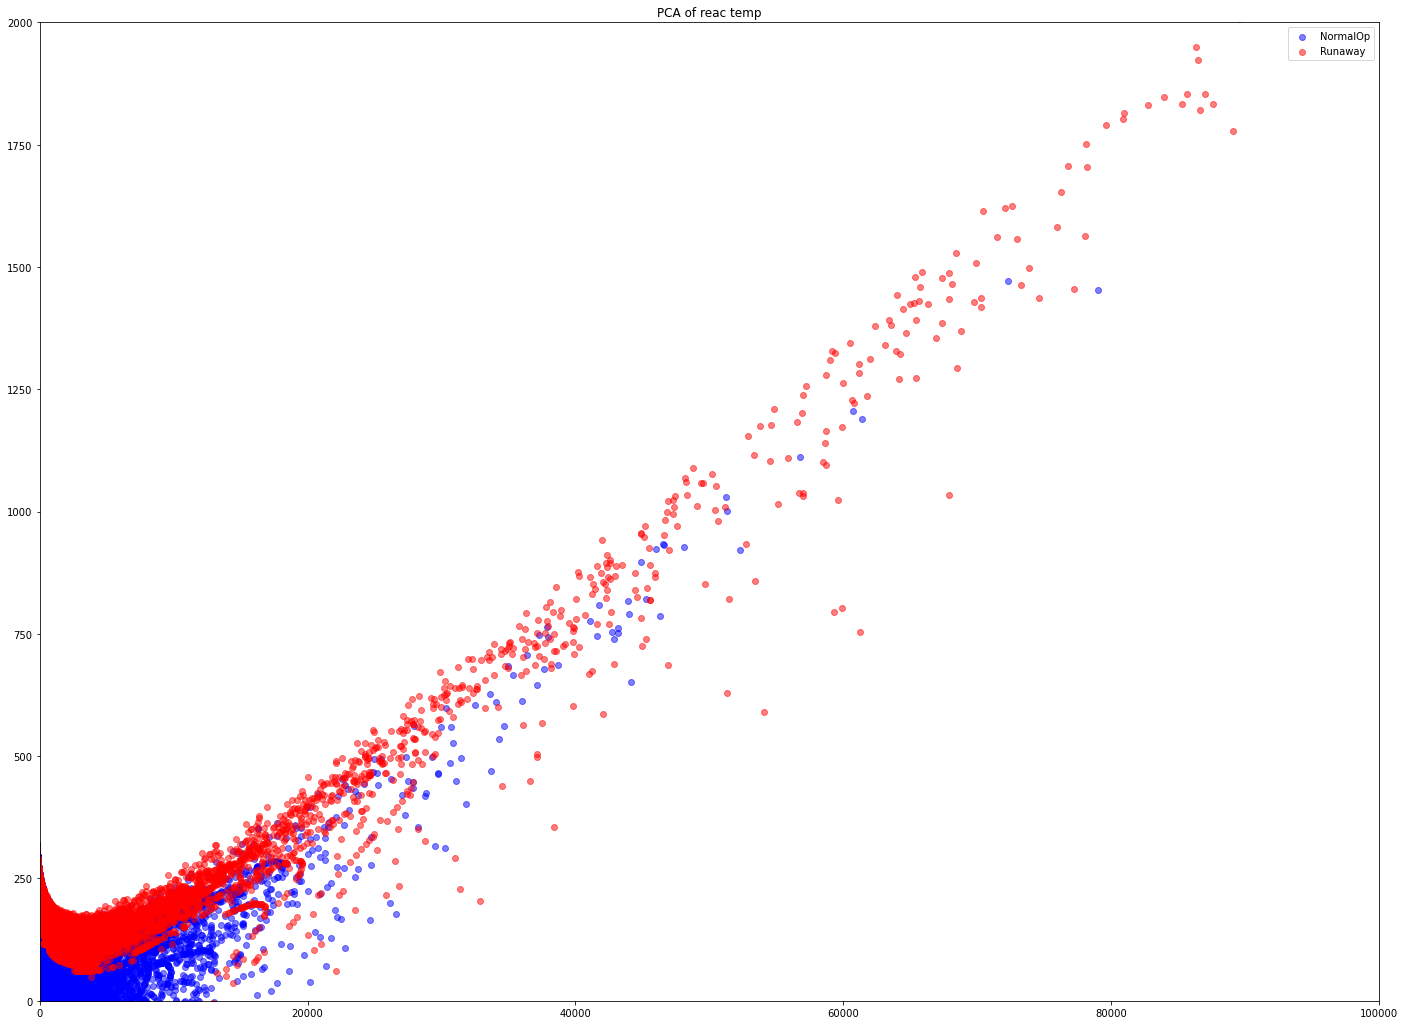

<Figure size 432x288 with 0 Axes>

In [5]:
dados_crus = pd.read_csv(r'C:\Users\jvabd\Desktop\Projeto final\Banco de dados\OutPut5Corr.csv',sep = ';', header=0)
X_reduced = pd.DataFrame(dados_crus.iloc[:, [2,3,4,20,21]])
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_reduced)

TempMax = np.array(dados_crus.iloc[:,-1])
Semenov = np.array(dados_crus.iloc[:,-2])

fig = plt.figure(figsize=(16*1.5, 12*1.5))

plt.scatter(X_reduced[Semenov + TempMax == 0, 0], X_reduced[Semenov + TempMax == 0, 1], color='b'
            , alpha=.5,label='NormalOp')
plt.scatter(X_reduced[Semenov + TempMax != 0 , 0], X_reduced[Semenov + TempMax != 0, 1], color='r'
            , alpha=.5,label='Runaway')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of reac temp')
plt.xlim([0,1*10**5])
plt.ylim([0,2000])



plt.figure()

<Figure size 432x288 with 0 Axes>

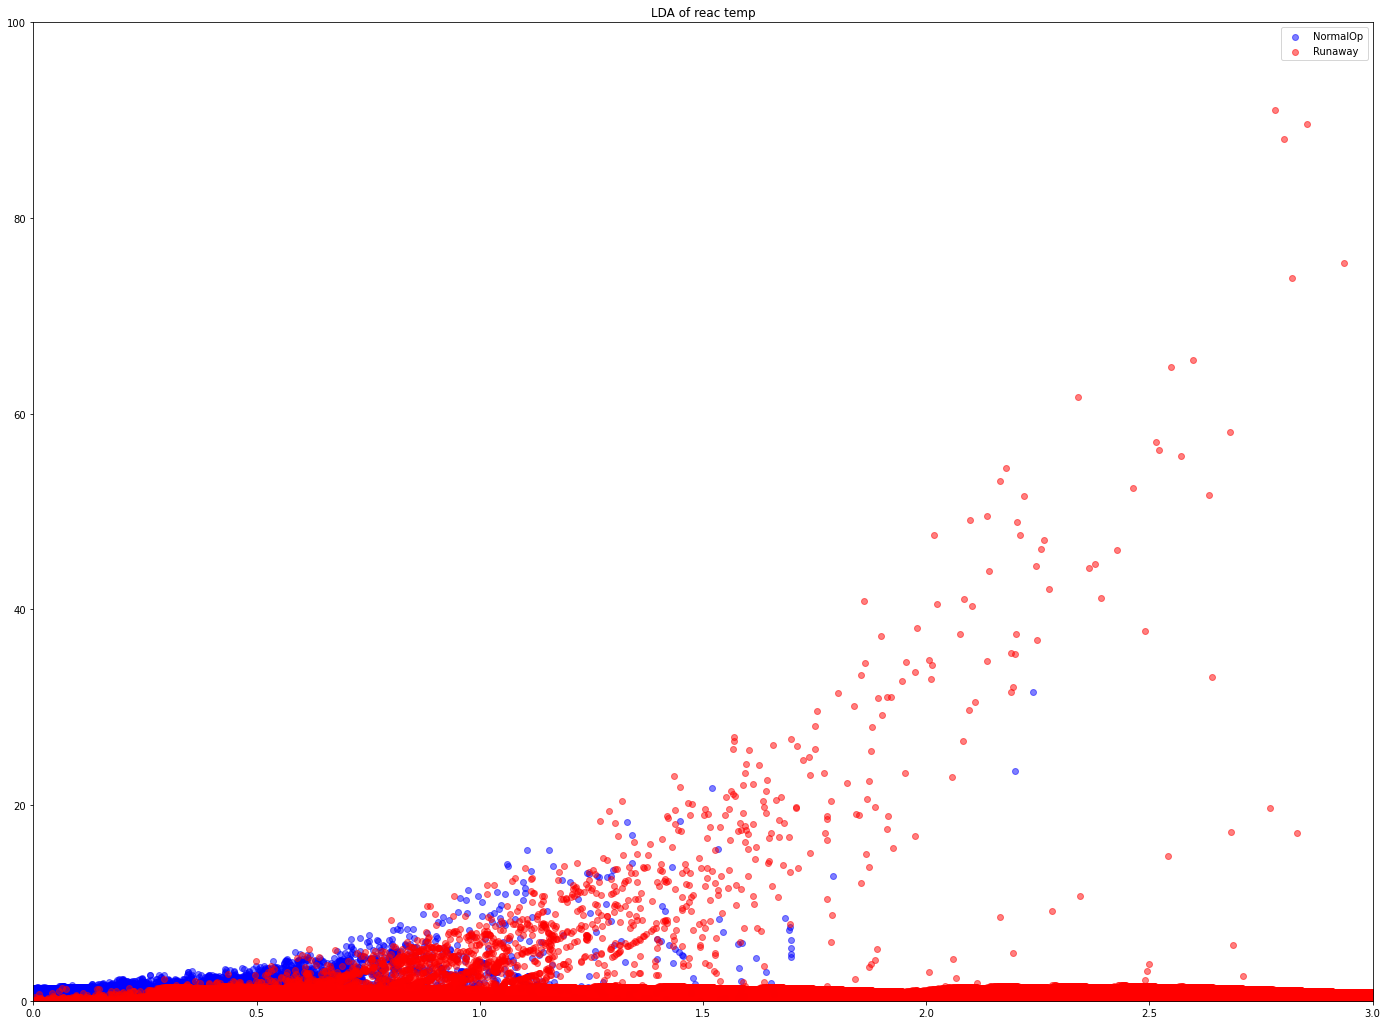

<Figure size 432x288 with 0 Axes>

In [7]:
dados_crus = pd.read_csv(r'C:\Users\jvabd\Desktop\Projeto final\Banco de dados\OutPut5Corr.csv',sep = ';', header=0)
X_reduced = pd.DataFrame(dados_crus.iloc[:, [2,3,4,20,21]])
lda = LinearDiscriminantAnalysis(n_components=2)

Classification = []
u = Semenov + TempMax
for i in u:
    if u[i] > 0:
        Classification[i] = 1
    
    
X_reduced_LDA = lda.fit(X_reduced, Classification).transform(X_reduced)

fig = plt.figure(figsize=(16*1.5, 12*1.5))

plt.scatter(X_reduced_LDA[Classification == 0, 0], X_reduced_LDA[Classification == 0, 1], color='b'
            , alpha=.5,label='NormalOp')
plt.scatter(X_reduced_LDA[Classification != 0 , 0], X_reduced_LDA[Classification != 0, 1], color='r'
            , alpha=.5,label='Runaway')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of reac temp')
plt.xlim([0,3])
plt.ylim([0,100])
plt.figure()


In [8]:
lda.explained_variance_ratio_

array([0.99770271, 0.00229729])

In [9]:
pca.explained_variance_ratio_

array([0.96591179, 0.03393872])

<Figure size 432x288 with 0 Axes>

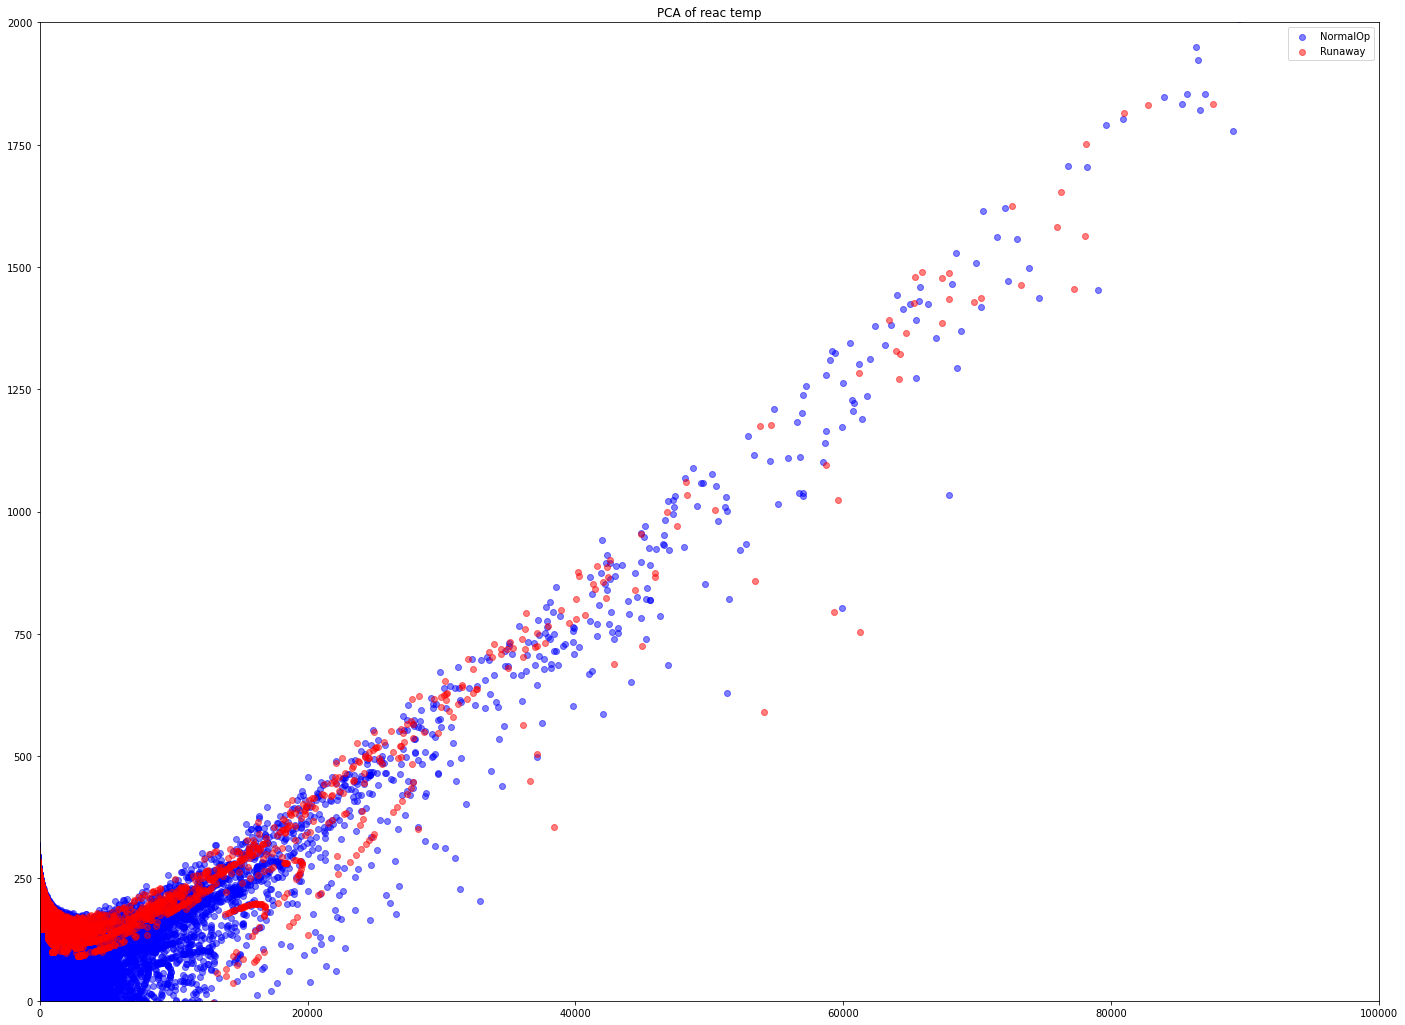

<Figure size 432x288 with 0 Axes>

In [10]:
# PCA somente para a classe do critério de Semenov 
dados_crus = pd.read_csv(r'C:\Users\jvabd\Desktop\Projeto final\Banco de dados\OutPut5Corr.csv',sep = ';', header=0)
X_reduced = pd.DataFrame(dados_crus.iloc[:, [2,3,4,20,21]])
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_reduced)


Semenov = np.array(dados_crus.iloc[:,-2])

fig = plt.figure(figsize=(16*1.5, 12*1.5))

plt.scatter(X_reduced[Semenov == 0, 0], X_reduced[Semenov == 0, 1], color='b'
            , alpha=.5,label='NormalOp')
plt.scatter(X_reduced[Semenov != 0 , 0], X_reduced[Semenov != 0, 1], color='r'
            , alpha=.5,label='Runaway')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA(Only Semenov) of reac temp')
plt.xlim([0,1*10**5])
plt.ylim([0,2000])



plt.figure()

<Figure size 432x288 with 0 Axes>

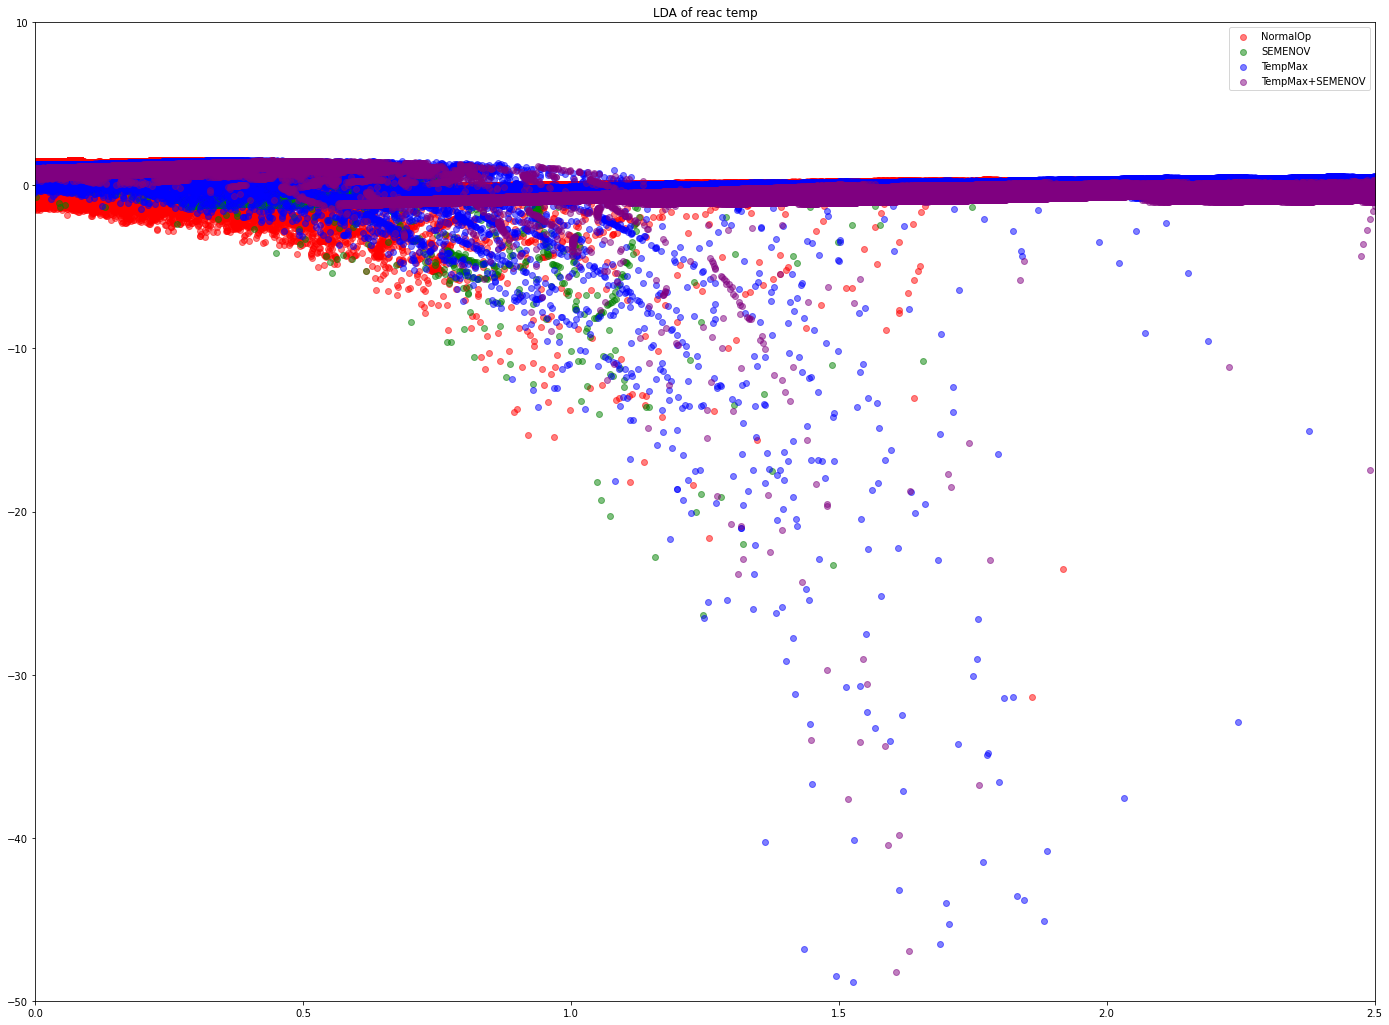

<Figure size 432x288 with 0 Axes>

In [26]:
dados_crus = pd.read_csv(r'C:\Users\jvabd\Desktop\Projeto final\Banco de dados\OutPut5Corr.csv',sep = ';', header=0)
X_reduced = pd.DataFrame(dados_crus.iloc[:, [2,3,4,20,21]])
lda = LinearDiscriminantAnalysis(n_components=2)

TempMax = np.array(dados_crus.iloc[:,-1])
Semenov = np.array(dados_crus.iloc[:,-2])

for i in range(len(TempMax)):
    if TempMax[i] > 0:
        TempMax[i] = TempMax[i] + 1
Classification = Semenov + TempMax
'''Dessa forma, temos dentro de Classification
as classes: NORMAL_OP com valor 0 ; SEMENOV com valor 1 ; TempMax com valor 2 ; TempMax+SEMENOV com valor 3  '''
    
    
X_reduced_LDA = lda.fit(X_reduced, Classification).transform(X_reduced)

fig = plt.figure(figsize=(16*1.5, 12*1.5))
Classes = ['NormalOp','Semenov','TempMax','Semenov+TempMax']
colors = ['r','b','g','purple']
Labels = ['NORMAL_OP','SEMENOV','TempMax','TempMax+SEMENOV']

plt.scatter(X_reduced_LDA[Classification == 0, 0], X_reduced_LDA[Classification == 0, 1], color='r'
            , alpha=.5,label='NormalOp')
plt.scatter(X_reduced_LDA[Classification == 1, 0], X_reduced_LDA[Classification == 1, 1], color='g'
            , alpha=.5,label='SEMENOV')
plt.scatter(X_reduced_LDA[Classification == 2, 0], X_reduced_LDA[Classification == 2, 1], color='b'
            , alpha=.5,label='TempMax')
plt.scatter(X_reduced_LDA[Classification == 3, 0], X_reduced_LDA[Classification == 3, 1], color='purple'
            , alpha=.5,label='TempMax+SEMENOV')


plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of reac temp')
plt.xlim([0,2.5])
plt.ylim([-50,10])
plt.figure()


In [25]:
qda = QuadraticDiscriminantAnalysis()
X_reduced_QDA = qda.fit(X_reduced, Classification)

plt.scatter(X_reduced_QDA[Classification == 0, 0], X_reduced_QDA[Classification == 0, 1], color='r'
            , alpha=.5,label='NormalOp')
plt.scatter(X_reduced_QDA[Classification == 1, 0], X_reduced_QDA[Classification == 1, 1], color='g'
            , alpha=.5,label='SEMENOV')
plt.scatter(X_reduced_QDA[Classification == 2, 0], X_reduced_QDA[Classification == 2, 1], color='b'
            , alpha=.5,label='TempMax')
plt.scatter(X_reduced_QDA[Classification == 3, 0], X_reduced_QDA[Classification == 3, 1], color='purple'
            , alpha=.5,label='TempMax+SEMENOV')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('QDA of reac temp')
plt.figure()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


TypeError: 'QuadraticDiscriminantAnalysis' object is not subscriptable

In [27]:
qda.fit(X_reduced, Classification)
#UserWarning: Variables are collinear
#THIS MEANS THE VARIABLES ARE ALMOST A LINEAR COMBINATION OF EACH OTHER, THEREFORE THE METHOD WON'T WORK

'''it makes the estimated coefficients impossible to interpret. 
If an increase in X1, say, is associated with an decrease in X2 and they both increase variable Y, 
every change in X1 will be compensated by a change in X2 and you will underestimate the effect of X1 on Y.
In QDA, you would underestimate the effect of X1 on the classification.'''

# Is this really it? it is expected for them to have a non-linear combination

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


'it makes the estimated coefficients impossible to interpret. \nIf an increase in X1, say, is associated with an decrease in X2 and they both increase variable Y, \nevery change in X1 will be compensated by a change in X2 and you will underestimate the effect of X1 on Y.\nIn QDA, you would underestimate the effect of X1 on the classification.'

In [22]:
X_reduced = pd.DataFrame(dados_crus.iloc[:, [2,3,4,20,21]])

nca = NeighborhoodComponentsAnalysis(n_components=2)
X_reduced_NCA = KNeighborsClassifier(n_neighbors=2)
nca.fit(X_reduced, Semenov)

plt.scatter(X_reduced_NCA[Semenov == 0, 0], X_reduced_NCA[Semenov == 0, 1], color='b'
            , alpha=.5,label='NormalOp')
plt.scatter(X_reduced_NCA[Semenov != 0 , 0], X_reduced_NCA[Semenov != 0, 1], color='r'
            , alpha=.5,label='Runaway')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('NCA of reac temp')
plt.figure()

MemoryError: Unable to allocate 158. TiB for an array with shape (4665600, 4665600) and data type float64